<a href="https://colab.research.google.com/github/Sarik123-long/VGG-net-Resnet-mobilenet-/blob/main/Through_the_Eyes_of_AI_How_VGG%2C_ResNet_%26_MobileNet_Perceive_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

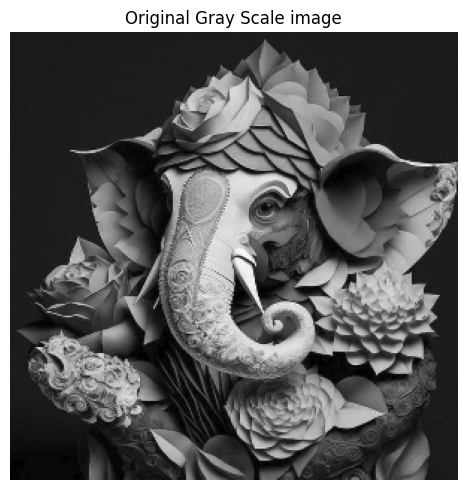

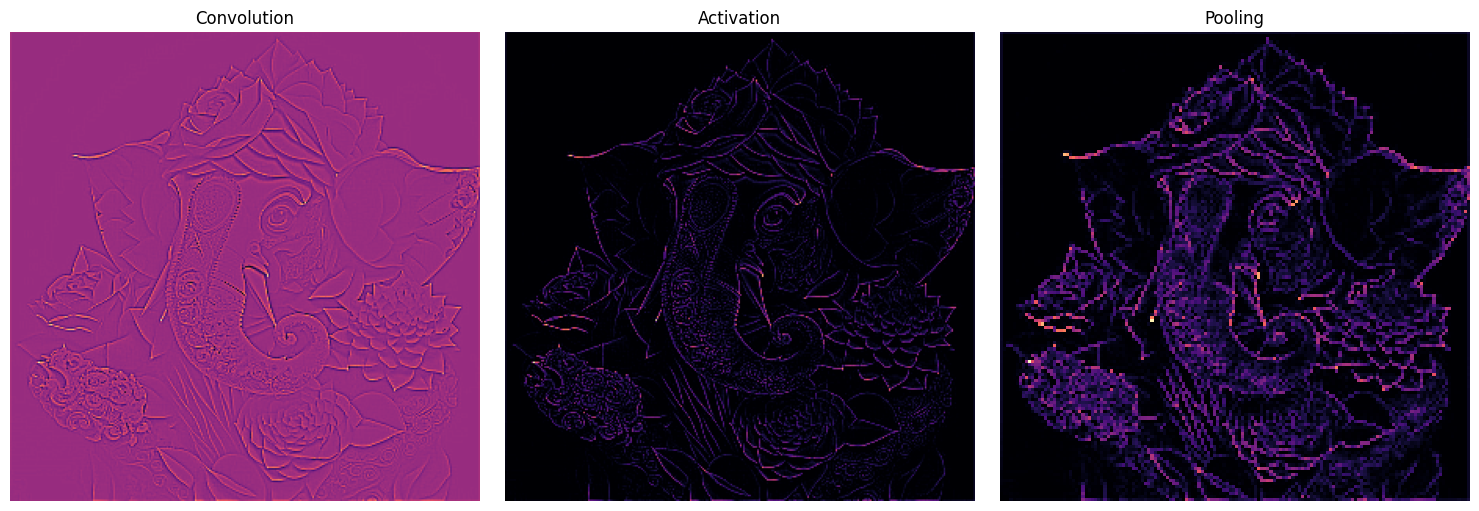

In [2]:
# import the necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

# set the param
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# define the kernel
kernel = tf.constant([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1],
                   ])

# load the image
image = tf.io.read_file('ganesha .jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

# plot the image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show();


# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# convolution layer
conv_fn = tf.nn.conv2d

image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1, # or (1, 1)
    padding='SAME',
)

plt.figure(figsize=(15, 5))

# Plot the convolved image
plt.subplot(1, 3, 1)

plt.imshow(
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.title('Convolution')

# activation layer
relu_fn = tf.nn.relu
# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)

plt.axis('off')
plt.title('Activation')

# Pooling layer
pool = tf.nn.pool
image_condense = pool(input=image_detect,
                             window_shape=(2, 2),
                             pooling_type='MAX',
                             strides=(2, 2),
                             padding='SAME',
                            )

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


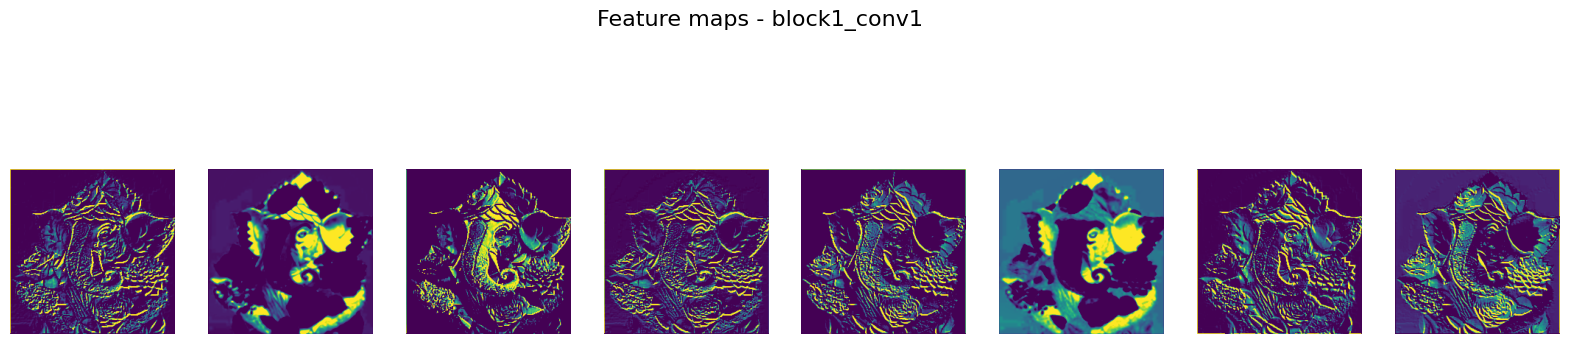

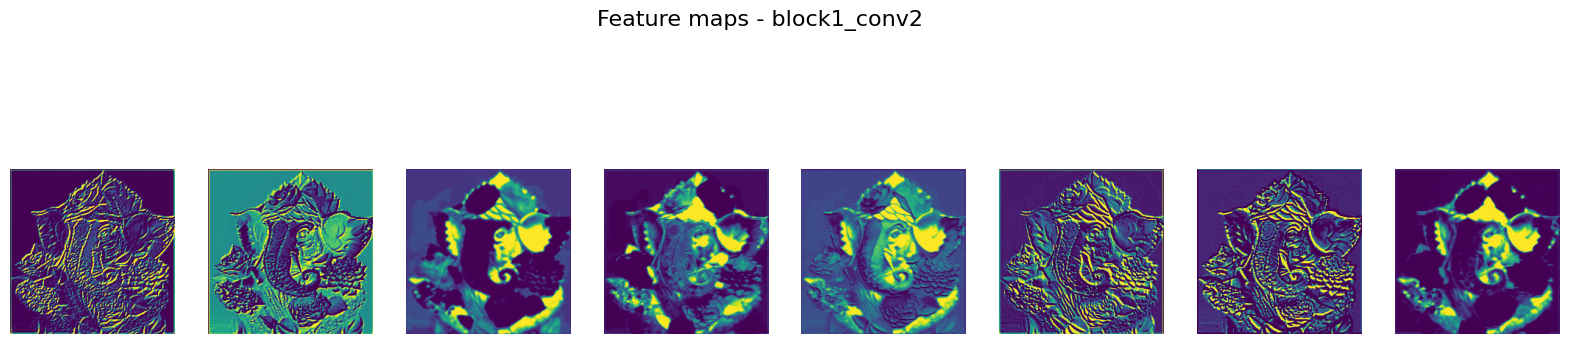

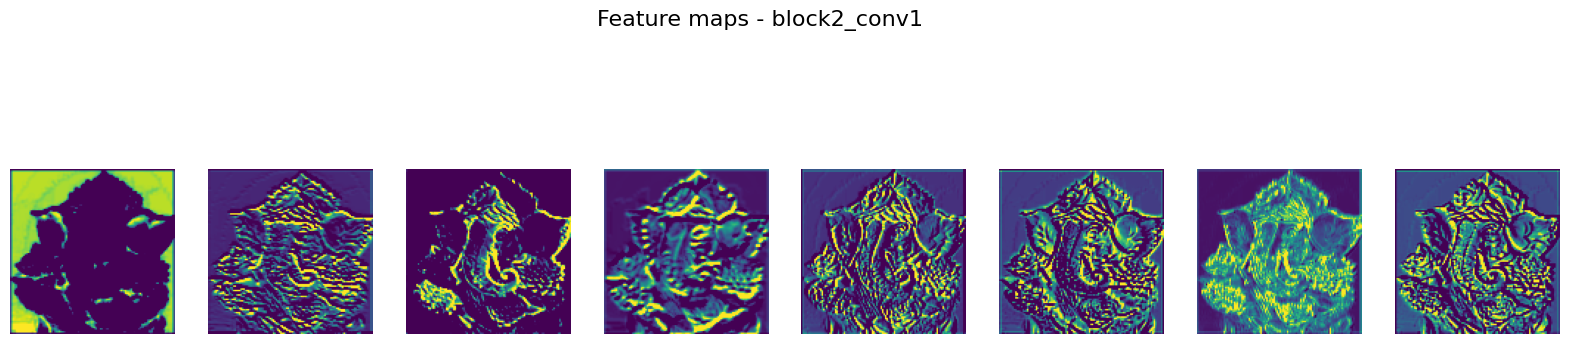

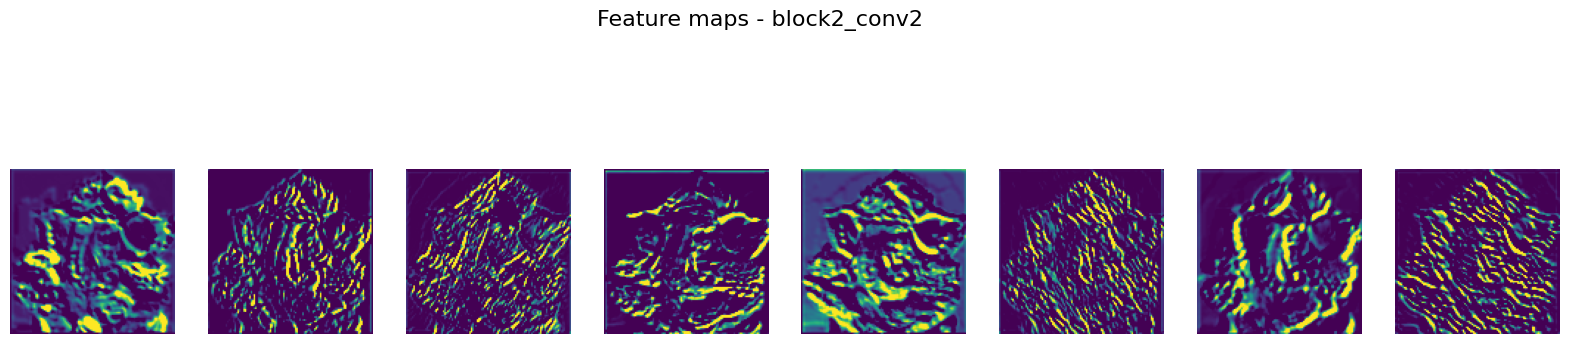

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load pretrained VGG16
model = VGG16(weights="imagenet", include_top=False)

# Load and preprocess your image
img_path = "ganesha .jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Pick some layers to visualize
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name][:4]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Get activations
activations = activation_model.predict(x)
layer_names = [layer.name for layer in model.layers if 'conv' in layer.name][:4]

# Visualization function
def display_feature_maps(activation, layer_name, n_cols=4):
    n_features = min(activation.shape[-1], 8)  # show only first 8 maps
    size = activation.shape[1]

    fig, axes = plt.subplots(1, n_features, figsize=(20, 5))
    fig.suptitle(f"Feature maps - {layer_name}", fontsize=16)

    for i in range(n_features):
        ax = axes[i]
        feature_map = activation[0, :, :, i]

        # Normalize for better visualization
        feature_map -= feature_map.mean()
        feature_map /= (feature_map.std() + 1e-5)
        feature_map *= 64
        feature_map += 128
        feature_map = np.clip(feature_map, 0, 255).astype("uint8")

        ax.imshow(feature_map, cmap="viridis")
        ax.axis("off")

    plt.show()

# Plot clean outputs
for layer_name, activation in zip(layer_names, activations):
    display_feature_maps(activation, layer_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


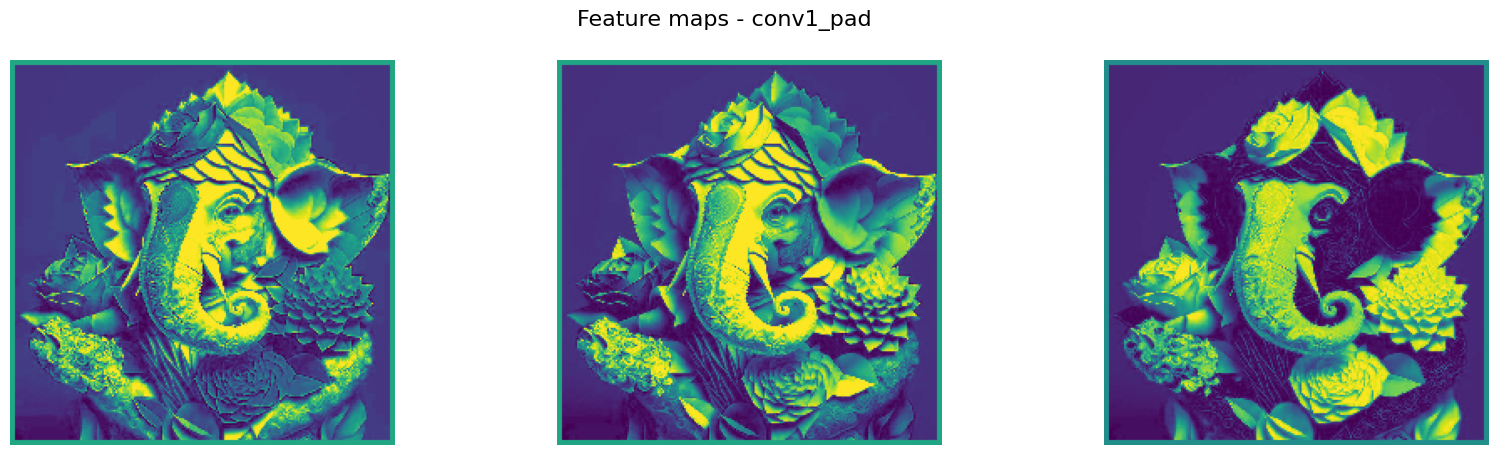

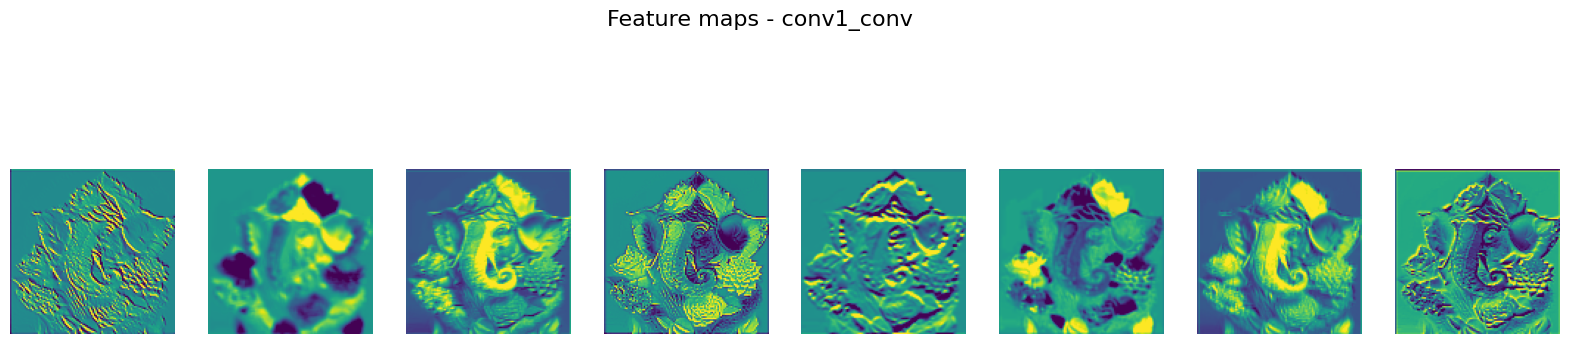

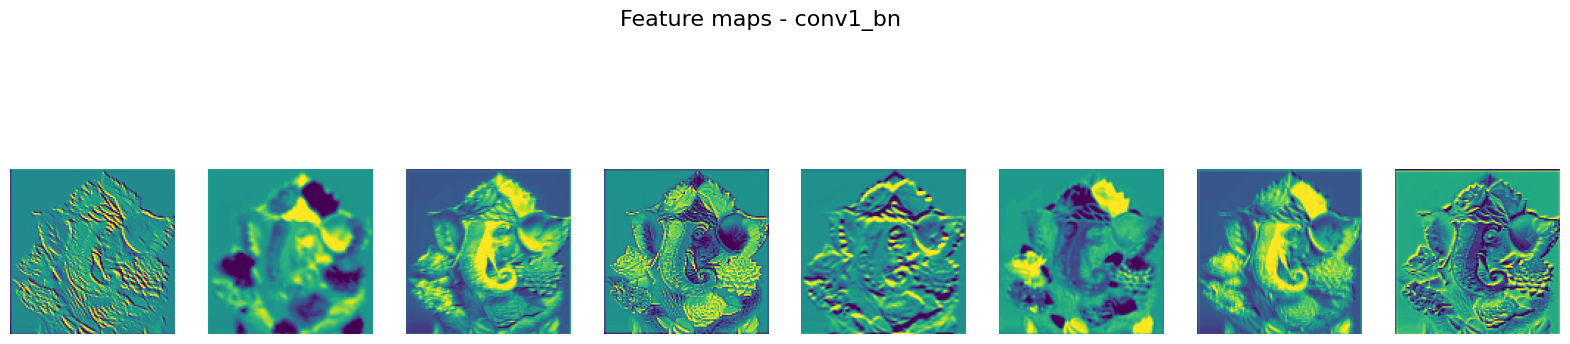

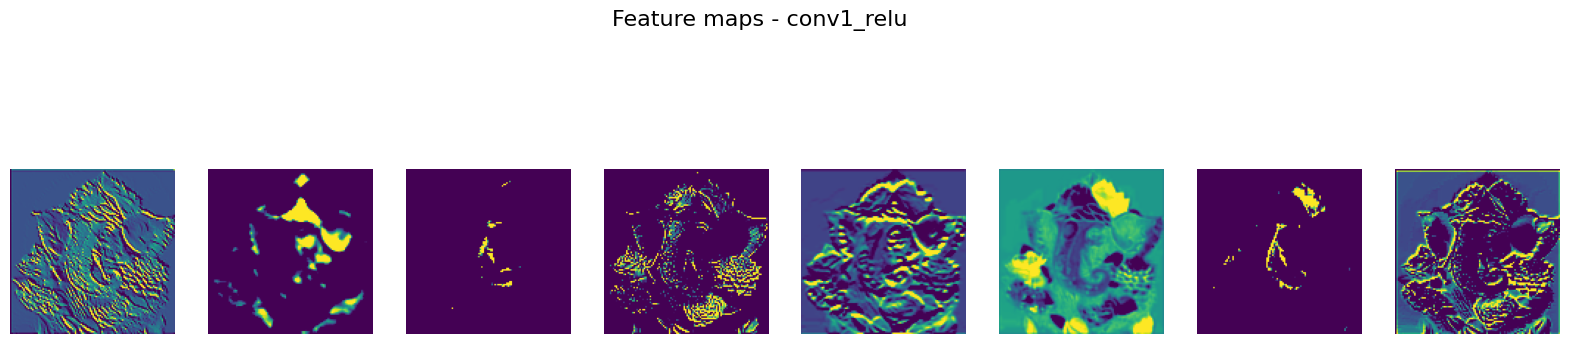

In [12]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load pretrained ResNet50 (without top classification head)
model = ResNet50(weights="imagenet", include_top=False)

# Load and preprocess image
img_path = "ganesha .jpg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Pick some convolutional layers (ResNet has "conv" and "conv*" layer names)
layer_outputs = [layer.output for layer in model.layers if "conv" in layer.name][:4]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Get activations
activations = activation_model.predict(x)
layer_names = [layer.name for layer in model.layers if "conv" in layer.name][:4]

# Visualization function
def display_feature_maps(activation, layer_name):
    n_features = min(activation.shape[-1], 8)  # show first 8 maps
    size = activation.shape[1]

    fig, axes = plt.subplots(1, n_features, figsize=(20, 5))
    fig.suptitle(f"Feature maps - {layer_name}", fontsize=16)

    for i in range(n_features):
        ax = axes[i]
        feature_map = activation[0, :, :, i]

        # Normalize
        feature_map -= feature_map.mean()
        feature_map /= (feature_map.std() + 1e-5)
        feature_map *= 64
        feature_map += 128
        feature_map = np.clip(feature_map, 0, 255).astype("uint8")

        ax.imshow(feature_map, cmap="viridis")
        ax.axis("off")

    plt.show()
    # 6. Plot feature maps
# -----------------------------
for layer_name, activation in zip(layer_names, activations):
    display_feature_maps(activation, layer_name)


/tmp/ipython-input-3120391599.py:11: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNet(weights="imagenet", include_top=False)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


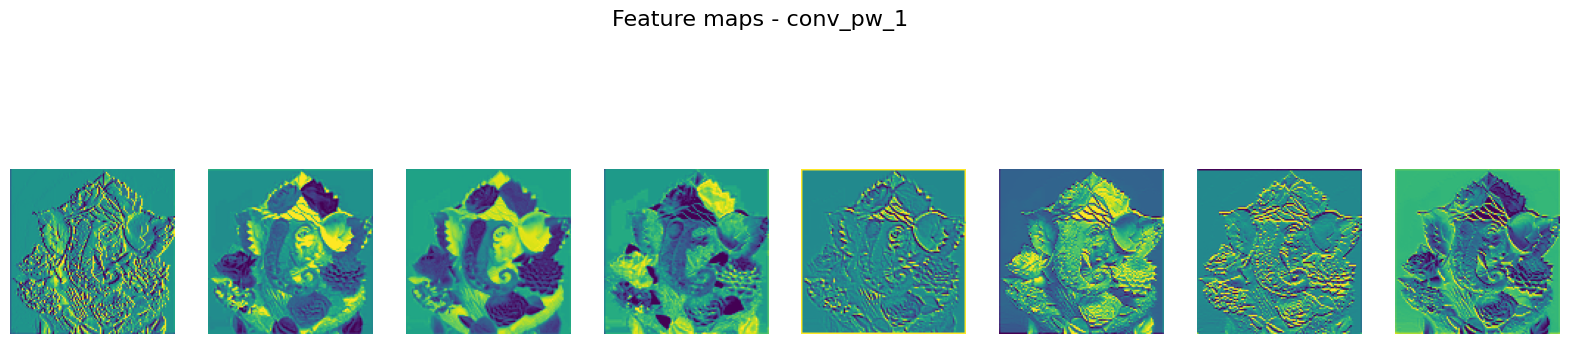

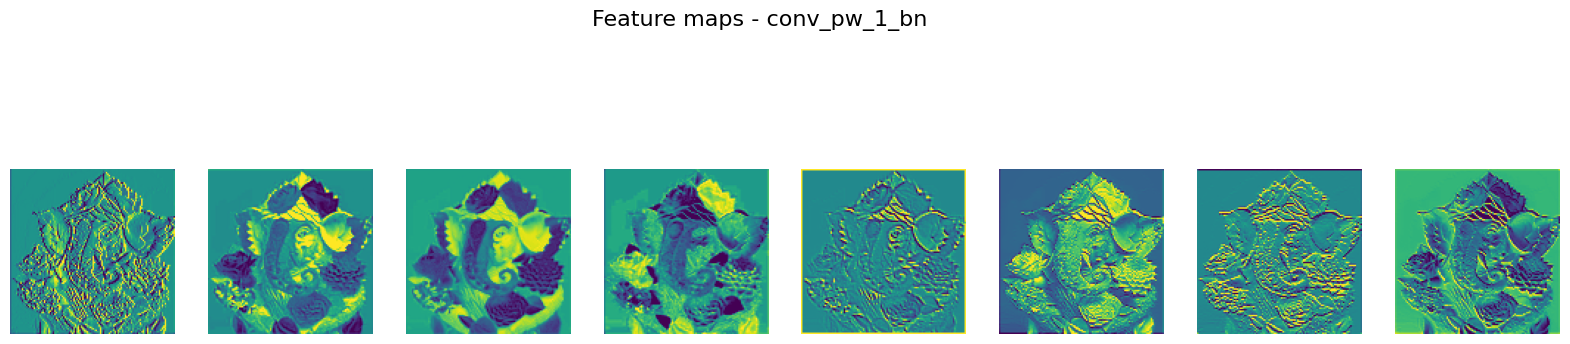

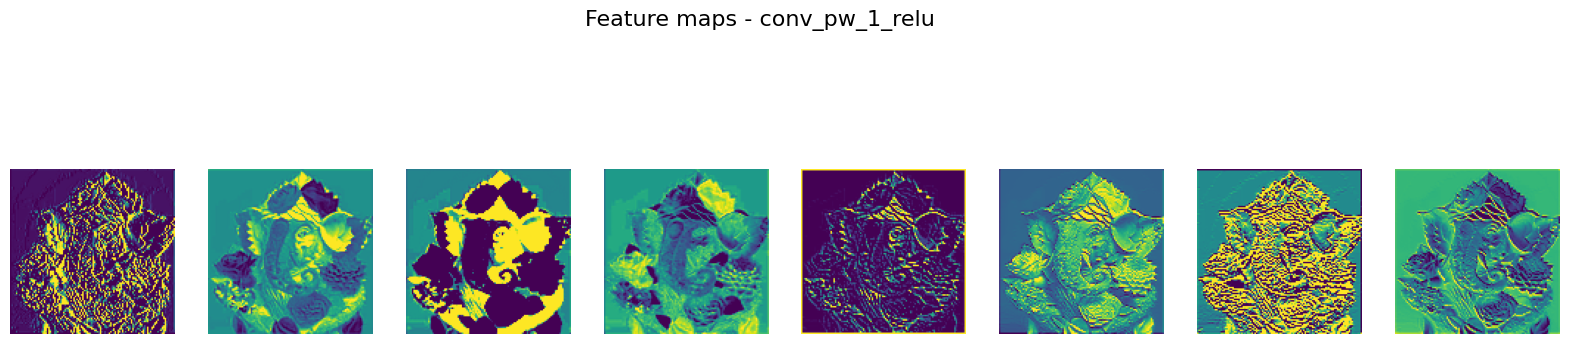

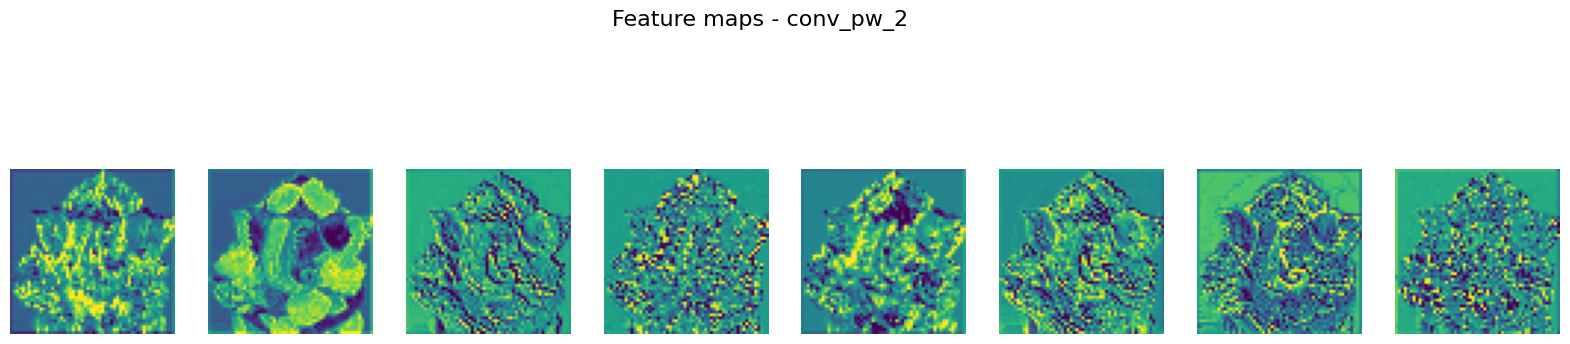

In [13]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load Pretrained MobileNet
# -----------------------------
model = MobileNet(weights="imagenet", include_top=False)

# -----------------------------
# 2. Load and preprocess image
# -----------------------------
img_path = "ganesha .jpg"   # change to your image path
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# -----------------------------
# 3. Choose some conv layers
# -----------------------------
# MobileNet layers are named "conv_pw", "conv_dw", etc.
layer_outputs = [layer.output for layer in model.layers if "conv_pw" in layer.name][:4]
layer_names = [layer.name for layer in model.layers if "conv_pw" in layer.name][:4]

activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# -----------------------------
# 4. Get activations
# -----------------------------
activations = activation_model.predict(x)

# -----------------------------
# 5. Visualization function
# -----------------------------
def display_feature_maps(activation, layer_name):
    n_features = min(activation.shape[-1], 8)  # show first 8 maps
    size = activation.shape[1]

    fig, axes = plt.subplots(1, n_features, figsize=(20, 5))
    fig.suptitle(f"Feature maps - {layer_name}", fontsize=16)

    for i in range(n_features):
        ax = axes[i]
        feature_map = activation[0, :, :, i]

        # Normalize for better visualization
        feature_map -= feature_map.mean()
        feature_map /= (feature_map.std() + 1e-5)
        feature_map *= 64
        feature_map += 128
        feature_map = np.clip(feature_map, 0, 255).astype("uint8")

        ax.imshow(feature_map, cmap="viridis")
        ax.axis("off")

    plt.show()

# -----------------------------
# 6. Plot feature maps
# -----------------------------
for layer_name, activation in zip(layer_names, activations):
    display_feature_maps(activation, layer_name)
